<div style="
    background: linear-gradient(to right, #fbb4ae, #b3cde3); /* Soft pastel pink to pastel blue */
    padding: 30px; 
    border-radius: 15px;
    color: #377eb8; /* Deep pastel blue */
    font-weight: bold; 
    text-align: center;
    font-size: 28px; 
    font-family: 'Comic Sans MS', sans-serif; /* Playful font */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);
">
    Bank Churn Binary Classification
</div>


<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Import Some Important Libraries:
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

c:\Users\Ayman\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Remove warnings:
</div

In [2]:
import warnings
warnings.simplefilter("ignore")

<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Display all columns and rows in the output:
</div>


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Load our data:
</div>


In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Let's have information about the dataset:
</div>


In [5]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
train_data["EstimatedSalary"][0:7]

0    181449.97
1     49503.50
2    184866.69
3     84560.88
4     15068.83
5    136024.31
6     29792.11
Name: EstimatedSalary, dtype: float64

In [7]:
# Sort by EstimatedSalary
df_sorted = train_data.sort_values(by='EstimatedSalary', ascending=True) 
 # Display the top 10 rows 
print(df_sorted.head(20))

            id  CustomerId   Surname  CreditScore Geography  Gender   Age  \
89788    89788    15794479  Li Fonti          635   Germany  Female  32.0   
122294  122294    15791053  Lucciano          635     Spain    Male  45.0   
112272  112272    15762532      Chiu          675    France    Male  38.0   
106909  106909    15803654    Angelo          614   Germany  Female  33.0   
14164    14164    15791053  Lucciano          709    France    Male  45.0   
140132  140132    15627185  Yegorova          569   Germany    Male  43.0   
101694  101694    15791053  Lucciano          495   Germany    Male  49.0   
90068    90068    15791053  Lucciano          706     Spain  Female  52.0   
147640  147640    15791053  Lucciano          709   Germany    Male  45.0   
118103  118103    15658057  Padovesi          696   Germany    Male  44.0   
152176  152176    15581252   Palerma          738   Germany  Female  38.0   
95713    95713    15734610       Lai          537   Germany  Female  59.0   

In [8]:
#show number of rows and columns
print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)


Shape of train_data: (165034, 14)
Shape of test_data: (110023, 13)


In [9]:
#show datatype and count non null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [10]:
#show if there is full duplicates 
train_data.duplicated().sum()

0

there aren't duplicate values

**i will drop " id" ,"CustomerId" ,"Surname" columns because they are useless**

In [11]:
train_data.drop(columns=['id', 'CustomerId','Surname'], inplace=True)
test_data.drop(columns=['id', 'CustomerId','Surname'], inplace=True)

In [12]:
train_data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
test_data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

there aren't missing values

In [14]:
# Generate descriptive statistics for quantitative columns in the DataFrame
train_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [37]:
train_data.head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668.0,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627.0,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678.0,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581.0,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716.0,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,588.0,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,593.0,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,678.0,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,676.0,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,583.0,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    EDA:
</div>


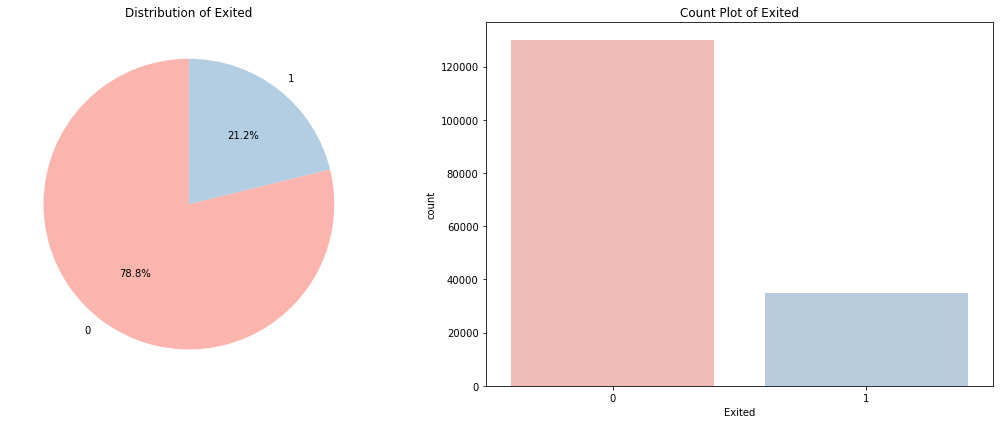

In [16]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for 'Exited' column
status_counts = train_data['Exited'].value_counts()
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Pastel1'))
axes[0].set_title('Distribution of Exited')

# Count plot for 'Exited' column
sns.countplot(x='Exited', data=train_data, palette='Pastel1', ax=axes[1])
axes[1].set_title('Count Plot of Exited')

plt.tight_layout()
plt.show()

only 21.2% is Exited ,it looks that we have an imbalanced data 

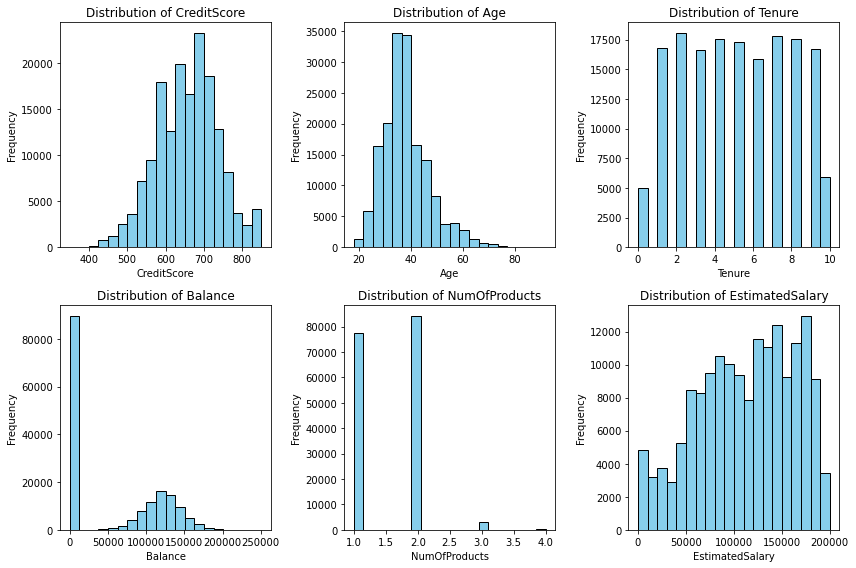

In [17]:
# Histogram of numerical variables
numerical_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    plt.hist(train_data[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

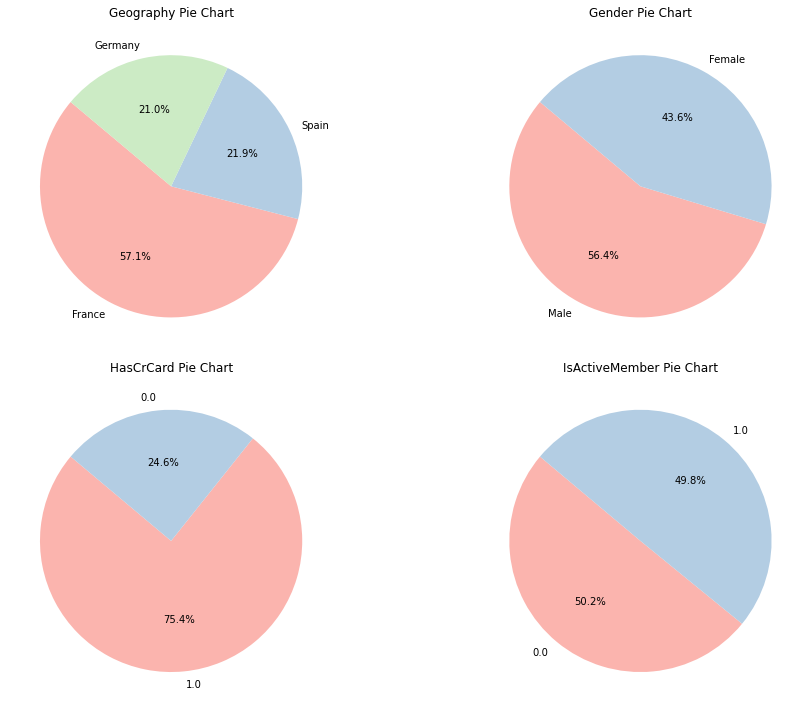

In [18]:
# pie chart for categorical variables
categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    counts = train_data[var].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
    plt.title(f'{var} Pie Chart')
plt.tight_layout()
plt.show()

* france is The biggest country where the customer resides .

* most customer's gender is male .

* most customers have card .



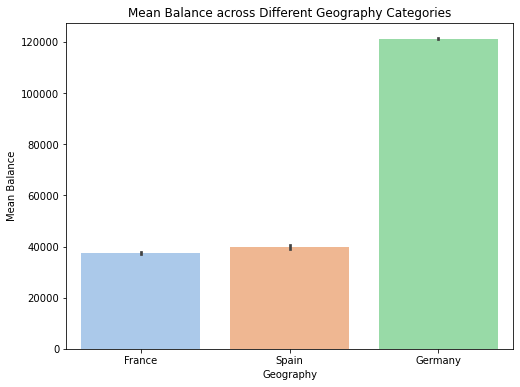

In [19]:
# Bar plot for mean Balance across different Geography categories
plt.figure(figsize=(8, 6))
sns.barplot(x='Geography', y='Balance', data=train_data, palette='pastel', estimator=lambda x: sum(x) / len(x))
plt.title('Mean Balance across Different Geography Categories')
plt.xlabel('Geography')
plt.ylabel('Mean Balance')
plt.show()


Germany has the highest average balance among the different geography categories, indicating that customers from Germany tend to maintain higher account balances compared to customers from other countries.

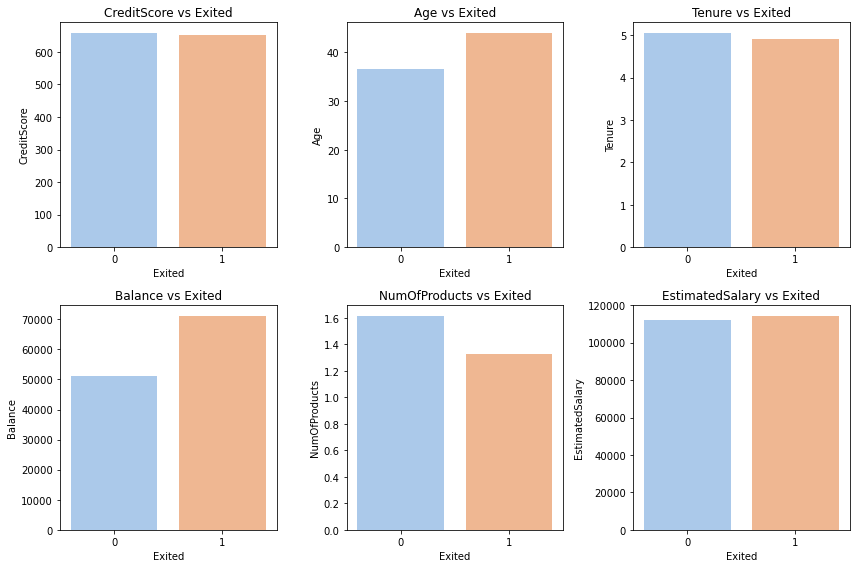

In [20]:
# Bar plot for numerical variables with respect to 'Exited'
plt.figure(figsize=(12, 8))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Exited', y=var, data=train_data, palette='pastel', ci=None)
    plt.title(f'{var} vs Exited')
    plt.xlabel('Exited')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


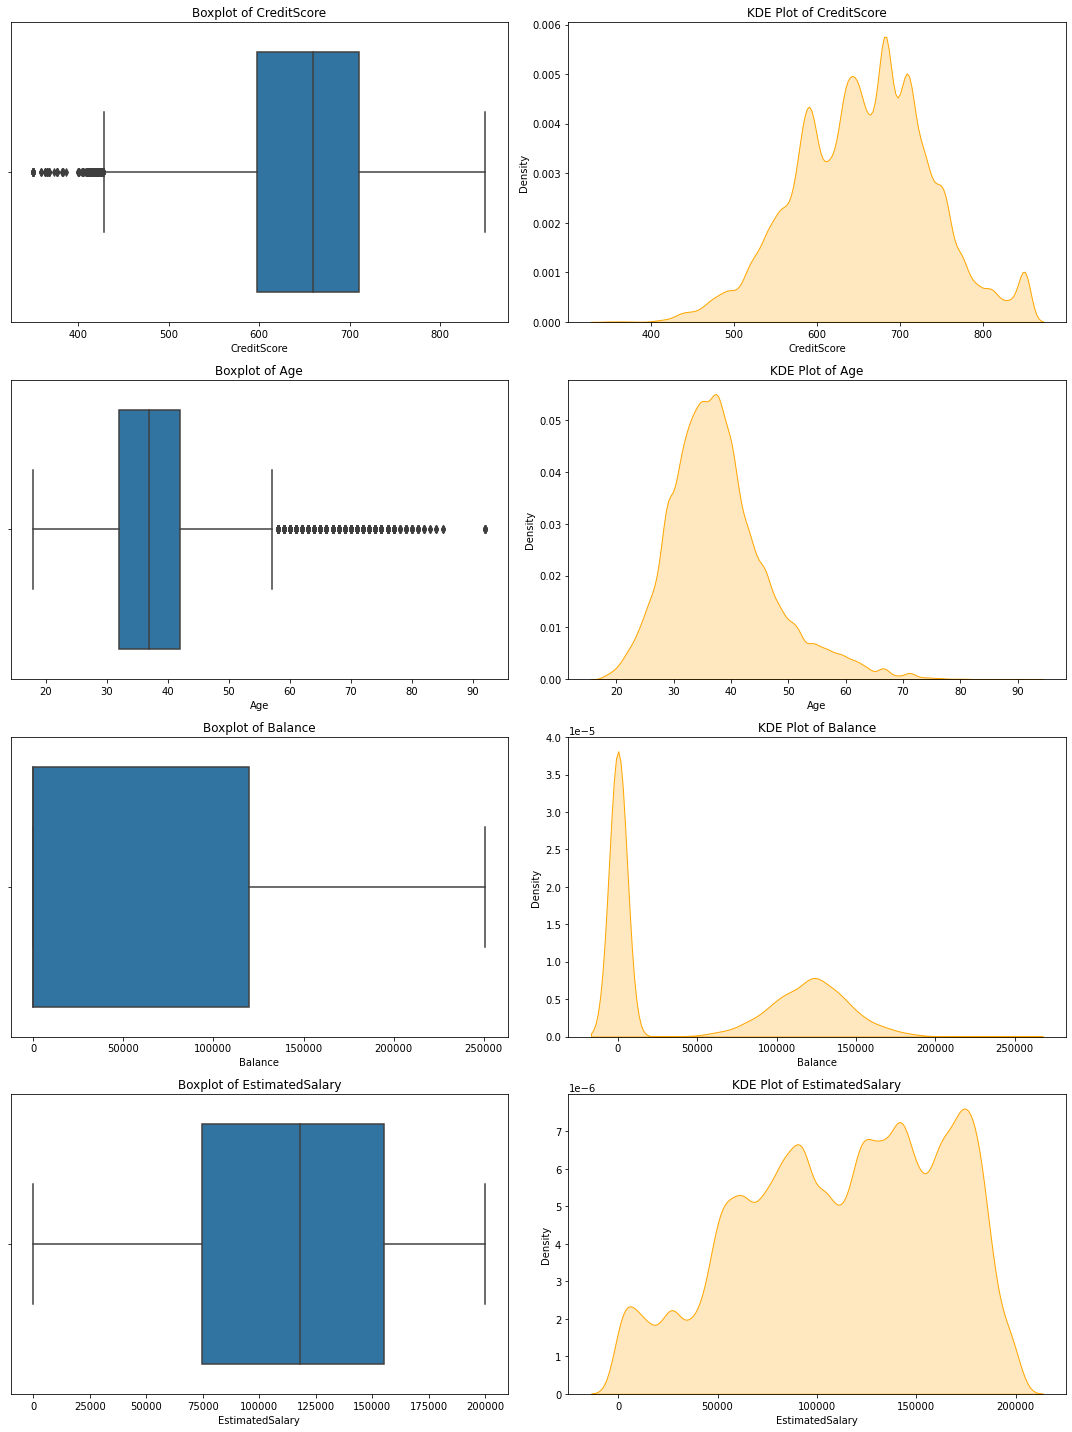

In [21]:

# Filter out continuous columns
continuous_vars = ['CreditScore', 'Age',  'Balance', 'EstimatedSalary']

# Define the number of rows and columns for subplots
num_rows = len(continuous_vars)
num_cols = 2  # Two plots for each column (box plot and KDE plot)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate over each continuous variable and create box plots and KDE plots
for i, column in enumerate(continuous_vars):
    # Box plot
    sns.boxplot(x=train_data[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel(column)

    # KDE plot
    sns.kdeplot(data=train_data[column], ax=axes[i, 1], color='orange', fill=True)
    axes[i, 1].set_title(f'KDE Plot of {column}')
    axes[i, 1].set_xlabel(column)

# Adjust layout
plt.tight_layout()

<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Preprocessing:
</div>


In [22]:
# Function to calculate percentage of outliers using IQR method
def percentage_outliers(data_series):
    # Calculate the first and third quartiles
    Q1 = np.percentile(data_series, 25)
    Q3 = np.percentile(data_series, 75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    
    # Calculate the percentage of outliers
    percentage = (len(outliers) / len(data_series)) * 100
    
    return percentage

# Dictionary to store the percentage of outliers for each continuous variable
outliers_percentage = {}

# Iterate over each continuous variable and calculate the percentage of outliers
for column in continuous_vars:
    outliers_percentage[column] = percentage_outliers(train_data[column])

# Print the percentage of outliers for each column
for column, percentage in outliers_percentage.items():
    print(f'Percentage of outliers in {column}: {percentage:.2f}%')


Percentage of outliers in CreditScore: 0.15%
Percentage of outliers in Age: 3.87%
Percentage of outliers in Balance: 0.00%
Percentage of outliers in EstimatedSalary: 0.00%


In [23]:
# Function to replace outliers with lower_bound and upper_bound
def replace_outliers(data_series):
    # Calculate the first and third quartiles
    Q1 = np.percentile(data_series, 25)
    Q3 = np.percentile(data_series, 75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with lower_bound and upper_bound
    data_series[data_series < lower_bound] = lower_bound
    data_series[data_series > upper_bound] = upper_bound
    
    return data_series

# Iterate over each continuous variable and replace outliers
for column in continuous_vars:
    train_data[column] = replace_outliers(train_data[column])


In [24]:
# Separate numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

# Remove 'Exited' column from numerical_cols if present
if 'Exited' in numerical_cols:
    numerical_cols.remove('Exited')


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
import numpy as np

# Log transformation function
log_transform_func = FunctionTransformer(np.log1p)

# Define transformations for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder())
])

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('log', log_transform_func, ['Balance', 'EstimatedSalary'])
    ])

# Define final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Splitting Data:
</div>


In [26]:
# Split data into features and target variable
X = train_data.drop(columns=['Exited'])
y = train_data['Exited']


In [27]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
X_train.shape

(132027, 10)

In [29]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Geography', 'Gender']),
                                                 ('log',
              

In [30]:
# Apply the pipeline transformations on training and testing data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Modeling:
</div>


In [31]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define a list of models to evaluate
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    XGBClassifier()
]

# Define lists to store evaluation results
auc_scores = []
f1_scores = []

# Iterate over each model
for model in models:
    # Fit the model on the training data
    model.fit(X_train_transformed, y_train)
    
    # Predict probabilities on the testing data
    y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]
    
    # Calculate AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    
    # Predict classes on the testing data
    y_pred = model.predict(X_test_transformed)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Print or store the evaluation results
for model, auc, f1 in zip(models, auc_scores, f1_scores):
    print(f"Model: {type(model).__name__}, AUC: {auc}, F1 Score: {f1}")


Model: LogisticRegression, AUC: 0.8142029329606009, F1 Score: 0.4887942211520651
Model: RandomForestClassifier, AUC: 0.8753241125998847, F1 Score: 0.6158646740022993
Model: XGBClassifier, AUC: 0.8871875394264835, F1 Score: 0.6315617601436851


In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define hyperparameters to tune for XGBoost
param_grid_xgboost = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.3]  # Learning rate
}

# Define grid search for XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgboost, cv=5, scoring='roc_auc')

# Perform grid search
grid_search_xgb.fit(X_train_transformed, y_train)

# Get the best hyperparameters and model score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best parameters for XGBoost:", best_params_xgb)
print("Best AUC score for XGBoost:", best_score_xgb)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best AUC score for XGBoost: 0.8882452921418637


In [33]:
# Instantiate XGBoost classifier with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params_xgb)

# Train the final XGBoost model on the entire training dataset
best_model=best_xgb_model.fit(X_train_transformed, y_train)

# Predict probabilities on the testing data
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test_transformed)[:, 1]

# Calculate AUC score for the final XGBoost model
final_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Predict classes on the testing data
y_pred_xgb = best_xgb_model.predict(X_test_transformed)

# Calculate F1 score for the final XGBoost model
final_f1_xgb = f1_score(y_test, y_pred_xgb)

print("Final AUC score for XGBoost:", final_auc_xgb)
print("Final F1 Score for XGBoost:", final_f1_xgb)

Final AUC score for XGBoost: 0.8906568188624134
Final F1 Score for XGBoost: 0.6418422341989221


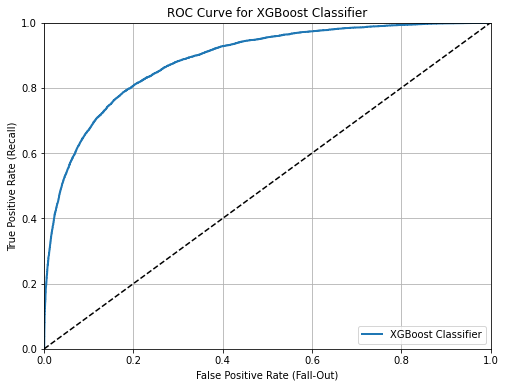

In [34]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, label='XGBoost Classifier')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()


In [35]:
from sklearn.metrics import classification_report

# Generate the classification report for the final XGBoost model
report = classification_report(y_test, y_pred_xgb)
print("Classification Report for XGBoost:")
print(report)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.57      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007



In [36]:
# Save the model
import joblib
joblib.dump(best_model, 'xgb_model.pkl')

['xgb_model.pkl']